# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [752]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy import stats
from citipy import citipy

In [ ]:
#API Keys: To Run Script, Enter openweathermap.org API Key Here

from api_keys import weather_api_key


In [172]:

#Basic API Call URL

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

In [173]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [174]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


#Hold Query URLs and Weather Data
urllist = []
citydata = []
weatherdata = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [176]:
#Create Full API Call Query URLs
for i in range(len(cities)):
    currentcity = cities[i]
    currentcity = currentcity.replace(" ", "%20")
    query_url = url + "appid=" + weather_api_key + "&q=" + currentcity + "&units=" + units
    urllist.append(query_url)

In [178]:
#Perform API Calls & Store Data in WeatherData
for y in urllist:
    citydata = requests.get(y).json()
    weatherdata.append(citydata)

In [666]:
#Print Cities With City Number and Corresponding Data
for x in range(len(cities)):
    print("\n" + cities[x] + " " + str(x))   
    print(weatherdata[x])


vanimo 0
{'coord': {'lon': 141.3028, 'lat': -2.6741}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 25.37, 'feels_like': 29, 'temp_min': 25.37, 'temp_max': 25.37, 'pressure': 1007, 'humidity': 88, 'sea_level': 1007, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 2.5, 'deg': 256}, 'clouds': {'all': 100}, 'dt': 1612974324, 'sys': {'country': 'PG', 'sunrise': 1612989779, 'sunset': 1613033713}, 'timezone': 36000, 'id': 2084442, 'name': 'Vanimo', 'cod': 200}

khatanga 1
{'coord': {'lon': 102.5, 'lat': 71.9667}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -25.29, 'feels_like': -31.42, 'temp_min': -25.29, 'temp_max': -25.29, 'pressure': 1014, 'humidity': 85, 'sea_level': 1014, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 146}, 'clouds': {'all': 43}, 'dt': 1612974324, 'sys': {'country

In [180]:
#Doublecheck WeatherData has as many objects as Cities
len(weatherdata)

611

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [692]:
#Create Master DataFrame & A Copy
weatherdf = pd.DataFrame(weatherdata)
weatherdf2 = weatherdf.copy()


In [693]:
#Load Names Column Into Variable
names = weatherdf['name']

In [694]:
#Index Data By City Name
weatherdf2 = weatherdf2.set_index(weatherdf2['name'])

In [716]:
weatherdf2

,coord,weather,base,main,visibility,wind,clouds,dt,sys,timezone,id,name,cod,rain,snow,message
name,,,,,,,,,,,,,,,,
Vanimo,"{'lon': 141.3028, 'lat': -2.6741}","[{'id': 804, 'main': 'Clouds', 'description': ...",stations,"{'temp': 25.37, 'feels_like': 29, 'temp_min': ...",10000.0,"{'speed': 2.5, 'deg': 256}",{'all': 100},1.612974e+09,"{'country': 'PG', 'sunrise': 1612989779, 'suns...",36000.0,2084442.0,Vanimo,200,NaN,NaN,NaN
Khatanga,"{'lon': 102.5, 'lat': 71.9667}","[{'id': 802, 'main': 'Clouds', 'description': ...",stations,"{'temp': -25.29, 'feels_like': -31.42, 'temp_m...",10000.0,"{'speed': 3.36, 'deg': 146}",{'all': 43},1.612974e+09,"{'country': 'RU', 'sunrise': 1612924489, 'suns...",25200.0,2022572.0,Khatanga,200,NaN,NaN,NaN
Airai,"{'lon': 125.4092, 'lat': -8.9266}","[{'id': 804, 'main': 'Clouds', 'description': ...",stations,"{'temp': 16.31, 'feels_like': 17.95, 'temp_min...",10000.0,"{'speed': 0.66, 'deg': 325}",{'all': 100},1.612974e+09,"{'country': 'TL', 'sunrise': 1612993211, 'suns...",32400.0,1651810.0,Airai,200,NaN,NaN,NaN
Indianola,"{'lon': -93.5574, 'lat': 41.3581}","[{'id': 804, 'main': 'Clouds', 'description': ...",stations,"{'temp': -12.42, 'feels_like': -17.78, 'temp_m...",10000.0,"{'speed': 2.57, 'deg': 30}",{'all': 90},1.612974e+09,"{'type': 1, 'id': 3863, 'country': 'US', 'sunr...",-21600.0,4861719.0,Indianola,200,NaN,NaN,NaN
Kapaa,"{'lon': -159.319, 'lat': 22.0752}","[{'id': 801, 'main': 'Clouds', 'description': ...",stations,"{'temp': 21, 'feels_like': 15.85, 'temp_min': ...",10000.0,"{'speed': 7.72, 'deg': 40}",{'all': 20},1.612974e+09,"{'type': 1, 'id': 7873, 'country': 'US', 'sunr...",-36000.0,5848280.0,Kapaa,200,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Barkhan,"{'lon': 69.5256, 'lat': 29.8977}","[{'id': 800, 'main': 'Clear', 'description': '...",stations,"{'temp': 15.01, 'feels_like': 11.17, 'temp_min...",10000.0,"{'speed': 2.02, 'deg': 220}",{'all': 0},1.612974e+09,"{'country': 'PK', 'sunrise': 1612922761, 'suns...",18000.0,1183307.0,Barkhan,200,NaN,NaN,NaN
Den Helder,"{'lon': 4.7593, 'lat': 52.9599}","[{'id': 600, 'main': 'Snow', 'description': 'l...",stations,"{'temp': -1.94, 'feels_like': -6.7, 'temp_min'...",10000.0,"{'speed': 3.09, 'deg': 40}",{'all': 75},1.612974e+09,"{'type': 1, 'id': 1533, 'country': 'NL', 'sunr...",3600.0,2757220.0,Den Helder,200,NaN,{'1h': 0.11},NaN
Ohangaron,"{'lon': 69.6383, 'lat': 40.9064}","[{'id': 802, 'main': 'Clouds', 'description': ...",stations,"{'temp': 12, 'feels_like': 7.27, 'temp_min': 1...",10000.0,"{'speed': 5.14, 'deg': 80}",{'all': 40},1.612974e+09,"{'type': 1, 'id': 9016, 'country': 'UZ', 'sunr...",18000.0,1513072.0,Ohangaron,200,NaN,NaN,NaN


In [717]:
#load Vital Columns Into Variables
coordinates = weatherdf2['coord']
maininfo = weatherdf2['main']
weatherinfo = weatherdf2['weather']
windinfo = weatherdf2['wind']
cloudinfo = weatherdf2['clouds']

In [696]:
#Extra Coordinates Data Into Columns
coordinates_df = pd.Series.to_frame(coordinates)
coordinates_df = coordinates_df['coord'].apply(pd.Series)
coordinates_df = coordinates_df.dropna(axis='columns', how='all')

coordinates_df

,lat,lon
name,,
Vanimo,-2.6741,141.3028
Khatanga,71.9667,102.5000
Airai,-8.9266,125.4092
Indianola,41.3581,-93.5574
Kapaa,22.0752,-159.3190
...,...,...
Barkhan,29.8977,69.5256
Den Helder,52.9599,4.7593
Ohangaron,40.9064,69.6383


In [697]:
#Extra Main Data Into Columns
main_df = pd.Series.to_frame(maininfo)
main_df = main_df['main'].apply(pd.Series)
main_df = main_df.dropna(axis='columns', how='all')

main_df

,feels_like,grnd_level,humidity,pressure,sea_level,temp,temp_max,temp_min
name,,,,,,,,
Vanimo,29.00,1004.0,88.0,1007.0,1007.0,25.37,25.37,25.37
Khatanga,-31.42,1010.0,85.0,1014.0,1014.0,-25.29,-25.29,-25.29
Airai,17.95,854.0,100.0,1008.0,1008.0,16.31,16.31,16.31
Indianola,-17.78,NaN,56.0,1030.0,NaN,-12.42,-12.22,-13.00
Kapaa,15.85,NaN,52.0,1018.0,NaN,21.00,21.00,21.00
...,...,...,...,...,...,...,...,...
Barkhan,11.17,892.0,28.0,1014.0,1014.0,15.01,15.01,15.01
Den Helder,-6.70,NaN,80.0,1018.0,NaN,-1.94,-1.67,-2.22
Ohangaron,7.27,NaN,62.0,1018.0,NaN,12.00,12.00,12.00


In [698]:
#Extract More Data Into Columns
weather_df = pd.Series.to_frame(weatherinfo)
weather_df = weather_df['weather'].apply(pd.Series)
weather_df = weather_df[0].apply(pd.Series)
weather_df = weather_df.dropna(axis='columns', how='all')

weather_df

,description,icon,id,main
name,,,,
Vanimo,overcast clouds,04n,804.0,Clouds
Khatanga,scattered clouds,03n,802.0,Clouds
Airai,overcast clouds,04n,804.0,Clouds
Indianola,overcast clouds,04d,804.0,Clouds
Kapaa,few clouds,02n,801.0,Clouds
...,...,...,...,...
Barkhan,clear sky,01n,800.0,Clear
Den Helder,light snow,13d,600.0,Snow
Ohangaron,scattered clouds,03n,802.0,Clouds


In [818]:
#Extract Wind Data Into Columns
wind_df = pd.Series.to_frame(windinfo)
wind_df = wind_df['wind'].apply(pd.Series)
wind_df = wind_df.dropna(axis='columns', how='all')

wind_df

,deg,gust,speed
name,,,
Vanimo,256.0,NaN,2.50
Khatanga,146.0,NaN,3.36
Airai,325.0,NaN,0.66
Indianola,30.0,NaN,2.57
Kapaa,40.0,NaN,7.72
...,...,...,...
Barkhan,220.0,NaN,2.02
Den Helder,40.0,NaN,3.09
Ohangaron,80.0,NaN,5.14


In [819]:
cloud_df = pd.Series.to_frame(cloudinfo)
cloud_df = cloud_df['clouds'].apply(pd.Series)
cloud_df = cloud_df.dropna(axis='columns', how='all')

cloud_df

,all
name,
Vanimo,100.0
Khatanga,43.0
Airai,100.0
Indianola,90.0
Kapaa,20.0
...,...
Barkhan,0.0
Den Helder,75.0
Ohangaron,40.0


In [820]:
#Join Vital Data Fields Into 1 DataFrame & Remove Extra Columns & Cities That Did Not Return a Call; Rename Columns
cleaned_df = pd.concat([coordinates_df, main_df, weather_df, wind_df, cloud_df], axis=1)
cleaned_df = cleaned_df.drop(['deg', 'gust', 'feels_like', 'grnd_level', 'pressure', 'main', 'sea_level', 'icon', 'id', 'description'], axis=1)
cleaned_df = cleaned_df.drop_duplicates(keep=False)
cleaned_df= cleaned_df.sort_index()

cleaned_df = cleaned_df.rename(columns={'speed': 'wind mph', 'all': 'clouds'})

cleaned_df

,lat,lon,humidity,temp,temp_max,temp_min,wind mph,clouds
name,,,,,,,,
Abancay,-13.6339,-72.8814,71.0,12.00,12.00,12.00,3.60,75.0
Abu Dhabi,24.4667,54.3667,78.0,22.57,23.00,22.00,4.63,0.0
Acapulco de Juárez,16.8634,-99.8901,54.0,28.00,28.00,28.00,2.57,1.0
Adelaide,-34.9333,138.6000,49.0,24.53,27.22,21.67,3.09,0.0
Adrar,20.5022,-10.0711,11.0,28.67,28.67,28.67,4.95,73.0
...,...,...,...,...,...,...,...,...
Zhanjiang,21.2815,110.3427,84.0,16.12,16.12,16.12,3.38,51.0
Zhigansk,66.7697,123.3711,85.0,-28.79,-28.79,-28.79,4.44,0.0
Zverinogolovskoye,54.4586,64.8542,86.0,-24.72,-24.72,-24.72,1.59,100.0


In [730]:
cleaned_df.to_csv("output_data/CityData.csv", index=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [734]:
#Remove Cities With Humitidity>100

cleaned_df2 = cleaned_df[cleaned_df['humidity'] <= 100] 

cleaned_df2

,lat,lon,humidity,temp,temp_max,temp_min,wind mph,clouds
name,,,,,,,,
Abancay,-13.6339,-72.8814,71.0,12.00,12.00,12.00,3.60,75.0
Abu Dhabi,24.4667,54.3667,78.0,22.57,23.00,22.00,4.63,0.0
Acapulco de Juárez,16.8634,-99.8901,54.0,28.00,28.00,28.00,2.57,1.0
Adelaide,-34.9333,138.6000,49.0,24.53,27.22,21.67,3.09,0.0
Adrar,20.5022,-10.0711,11.0,28.67,28.67,28.67,4.95,73.0
...,...,...,...,...,...,...,...,...
Zhanjiang,21.2815,110.3427,84.0,16.12,16.12,16.12,3.38,51.0
Zhigansk,66.7697,123.3711,85.0,-28.79,-28.79,-28.79,4.44,0.0
Zverinogolovskoye,54.4586,64.8542,86.0,-24.72,-24.72,-24.72,1.59,100.0


In [688]:
#NO CITIES WITH HUMIDITY > 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

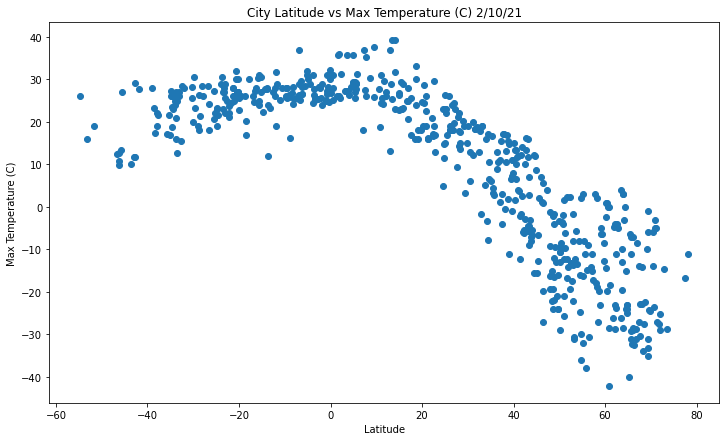

In [869]:
weatherdf3 = cleaned_df[['lat', 'temp_max']].copy()
weatherdf3 = weatherdf3.reset_index()

w = weatherdf3['lat']
v = weatherdf3['temp_max']
plt.scatter(w, v)

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs Max Temperature (C) 2/10/21')

plt.gcf().set_size_inches((12, 7))    
plt.savefig('output_data/lat_maxtemp.png')

plt.show()

## Latitude vs. Humidity Plot

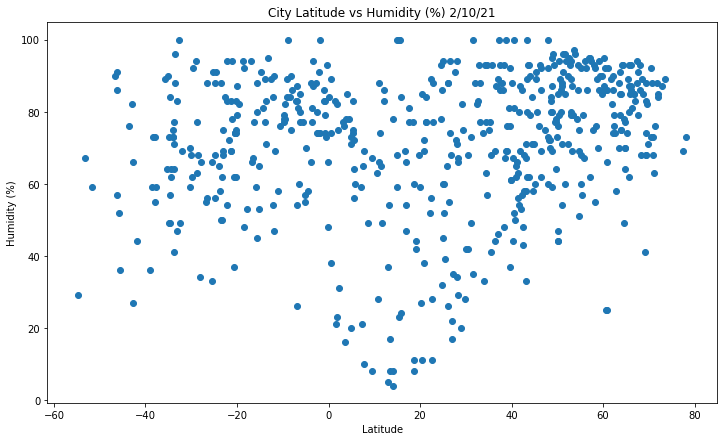

In [871]:
weatherdf4 = cleaned_df[['lat', 'humidity']].copy()
weatherdf4 = weatherdf4.reset_index()

d = weatherdf4['lat']
e = weatherdf4['humidity']
plt.scatter(d, e)

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity (%) 2/10/21')
plt.gcf().set_size_inches((12, 7))   

plt.savefig('output_data/lat_humidity.png')

plt.show()


## Latitude vs. Cloudiness Plot

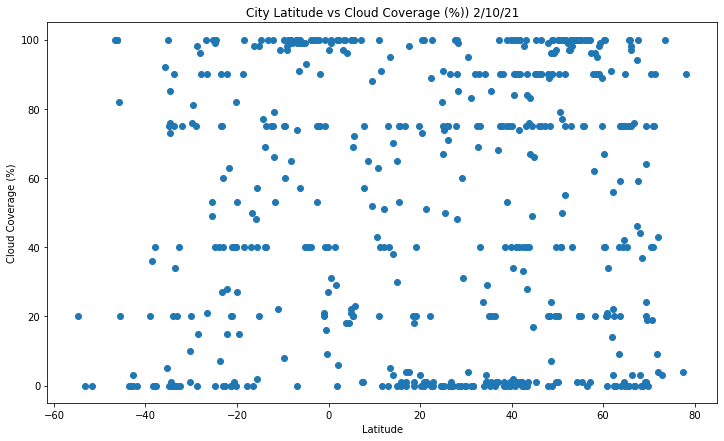

In [872]:
weatherdf5 = cleaned_df[['lat', 'clouds']].copy()
weatherdf5 = weatherdf5.reset_index()

f = weatherdf5['lat']
g = weatherdf5['clouds']
plt.scatter(f, g)

plt.ylabel('Cloud Coverage (%)')
plt.xlabel('Latitude')
plt.title('City Latitude vs Cloud Coverage (%)) 2/10/21')
plt.gcf().set_size_inches((12, 7))   

plt.savefig('output_data/lat_cloud.png')

plt.show()


## Latitude vs. Wind Speed Plot

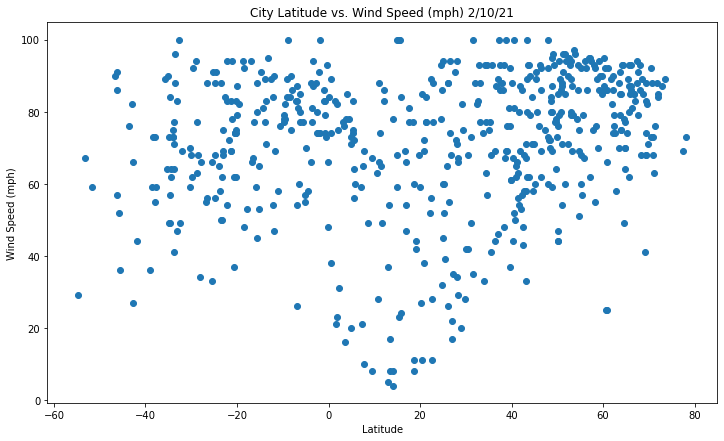

In [873]:
weatherdf6 = cleaned_df[['lat', 'wind mph']].copy()
weatherdf6 = weatherdf6.reset_index()

h = weatherdf4['lat']
j = weatherdf4['humidity']
plt.scatter(h, j)

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (mph) 2/10/21')
plt.gcf().set_size_inches((12, 7))  

plt.savefig('output_data/lat_wind.png')

plt.show()


## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [777]:
#Northern Hemisphere Only
weatherdf7 = cleaned_df[['lat', 'temp_max']].copy()
weatherdf7 = weatherdf7[weatherdf7['lat'] >= 0] 
weatherdf7

,lat,temp_max
name,,
Abu Dhabi,24.4667,23.00
Acapulco de Juárez,16.8634,28.00
Adrar,20.5022,28.67
Adré,13.4667,25.33
Afrikanda,67.4429,-13.90
...,...,...
Zhanjiang,21.2815,16.12
Zhigansk,66.7697,-28.79
Zverinogolovskoye,54.4586,-24.72


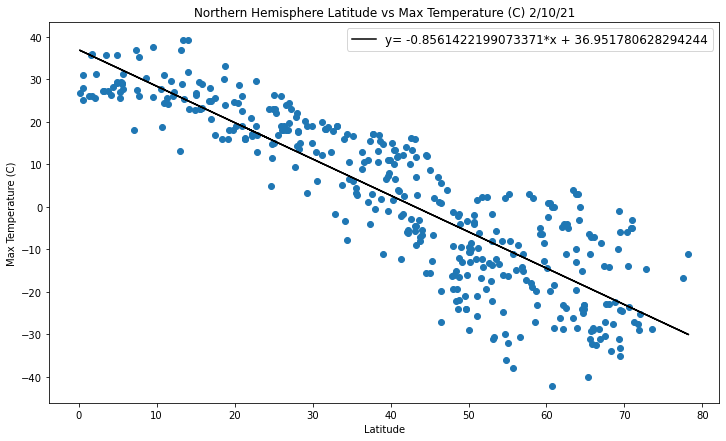

R value is -0.874210090997393


In [875]:
#Scatter Plot & Linear Regression

k = weatherdf7['lat']
l = weatherdf7['temp_max']
plt.scatter(k, l)

m, c = np.polyfit(k, l, 1)
plt.plot(k, (k*m + c), color = "k", label='y= ' + str(m) + '*x + ' + str(c))

slope, intercept, r_value, p_value, std_err = stats.linregress(k,l)

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Northern Hemisphere Latitude vs Max Temperature (C) 2/10/21')
plt.legend(fontsize=12)
plt.gcf().set_size_inches((12, 7)) 

plt.savefig('output_data/north__lat_maxtemp.png')

plt.show()


print("R value is " + str(r_value))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [847]:
#Southern Hemisphere Only
weatherdf8 = cleaned_df[['lat', 'temp_max']].copy()
weatherdf8 = weatherdf8[weatherdf8['lat'] <= 0] 

weatherdf8

,lat,temp_max
name,,
Abancay,-13.6339,12.00
Adelaide,-34.9333,27.22
Ahipara,-35.1667,16.82
Airai,-8.9266,16.31
Alenquer,-1.9417,24.00
...,...,...
Vanimo,-2.6741,25.37
Vao,-22.6667,24.80
Vila Velha,-20.3297,30.00


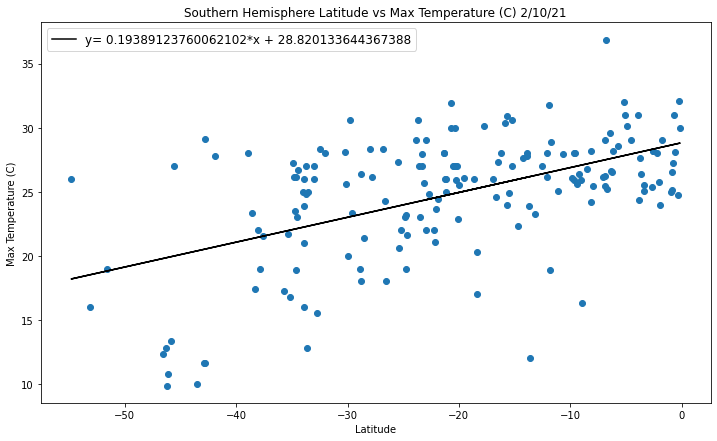

R value is 0.5293805796791928


In [876]:
#Scatter Plot & Linear Regression

n = weatherdf8['lat']
o = weatherdf8['temp_max']
plt.scatter(n, o)

m, c = np.polyfit(n, o, 1)
plt.plot(n, (m*n + c), color = "k", label='y= ' + str(m) + '*x + ' + str(c))

slope, intercept, r_value, p_value, std_err = stats.linregress(n,o)

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Southern Hemisphere Latitude vs Max Temperature (C) 2/10/21')

plt.legend(fontsize=12)
plt.gcf().set_size_inches((12, 7))

plt.savefig('output_data/south_lat_maxtemp.png')

plt.show()

print("R value is " + str(r_value))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [800]:
#Northern Hemisphere Only
weatherdf9 = cleaned_df[['lat', 'humidity']].copy()
weatherdf9 = weatherdf9[weatherdf9['lat'] >= 0] 
weatherdf9

,lat,humidity
name,,
Abu Dhabi,24.4667,78.0
Acapulco de Juárez,16.8634,54.0
Adrar,20.5022,11.0
Adré,13.4667,17.0
Afrikanda,67.4429,94.0
...,...,...
Zhanjiang,21.2815,84.0
Zhigansk,66.7697,85.0
Zverinogolovskoye,54.4586,86.0


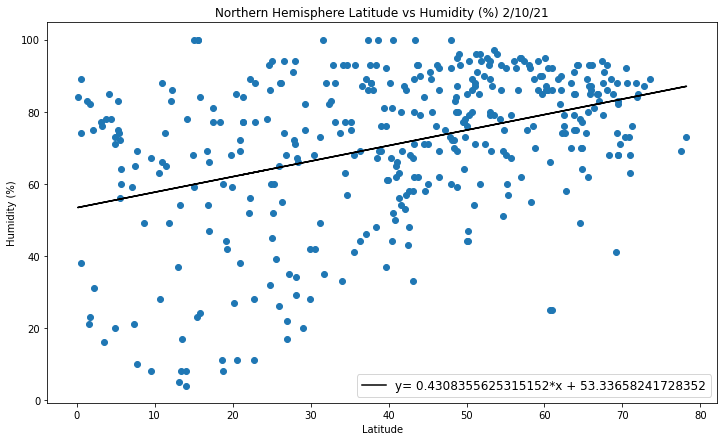

R value is 0.3967592038364537


In [877]:
#Scatter Plot & Linear Regression
p = weatherdf9['lat']
q = weatherdf9['humidity']
plt.scatter(p, q)

m, c = np.polyfit(p, q, 1)
plt.plot(p, (m*p + c), color = "k", label='y= ' + str(m) + '*x + ' + str(c))

slope, intercept, r_value, p_value, std_err = stats.linregress(p,q)

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere Latitude vs Humidity (%) 2/10/21')
plt.legend(fontsize=12)
plt.gcf().set_size_inches((12, 7))

plt.savefig('output_data/north_lat_humidity.png')

plt.show()

print("R value is " + str(r_value))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [817]:
#Southern Hemisphere Only
weatherdf10 = cleaned_df[['lat', 'humidity']].copy()
weatherdf10 = weatherdf10[weatherdf10['lat'] <= 0] 

weatherdf10

,lat,humidity
name,,
Abancay,-13.6339,71.0
Adelaide,-34.9333,49.0
Ahipara,-35.1667,90.0
Airai,-8.9266,100.0
Alenquer,-1.9417,100.0
...,...,...
Vanimo,-2.6741,88.0
Vao,-22.6667,84.0
Vila Velha,-20.3297,62.0


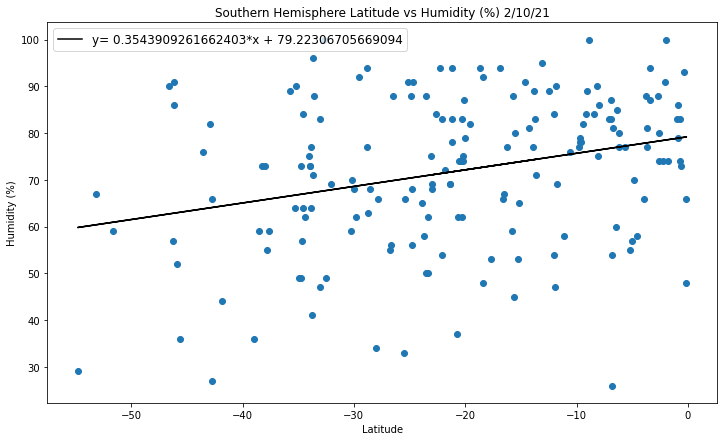

R value is 0.2907968792255898


In [879]:
#Scatter Plot & Linear Regression
r = weatherdf10['lat']
s = weatherdf10['humidity']
plt.scatter(r, s)

m, c = np.polyfit(r, s, 1)
plt.plot(r, (m*r + c), color = "k", label='y= ' + str(m) + '*x + ' + str(c))

slope, intercept, r_value, p_value, std_err = stats.linregress(r,s)

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere Latitude vs Humidity (%) 2/10/21')
plt.legend(fontsize=12)
plt.gcf().set_size_inches((12, 7))

plt.savefig('output_data/south_lat_humidity.png')

plt.show()

print("R value is " + str(r_value))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [807]:
#Northern Hemisphere Only
weatherdf11 = cleaned_df[['lat', 'clouds']].copy()
weatherdf11 = weatherdf11[weatherdf11['lat'] >= 0] 
weatherdf11

,lat,clouds
name,,
Abu Dhabi,24.4667,0.0
Acapulco de Juárez,16.8634,1.0
Adrar,20.5022,73.0
Adré,13.4667,5.0
Afrikanda,67.4429,94.0
...,...,...
Zhanjiang,21.2815,51.0
Zhigansk,66.7697,0.0
Zverinogolovskoye,54.4586,100.0


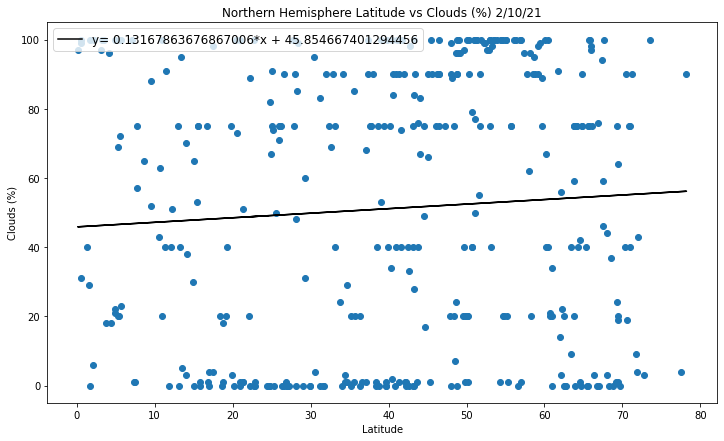

R value is 0.06695741982290528


In [891]:
#Scatter Plot & Linear Regression
t = weatherdf11['lat']
u = weatherdf11['clouds']
plt.scatter(t, u)

m, c = np.polyfit(t, u, 1)
plt.plot(t, (m*t + c), color = "k", label='y= ' + str(m) + '*x + ' + str(c))

slope, intercept, r_value, p_value, std_err = stats.linregress(t,u)

plt.xlabel('Latitude')
plt.ylabel('Clouds (%)')
plt.title('Northern Hemisphere Latitude vs Clouds (%) 2/10/21')
plt.legend(fontsize=12)
plt.gcf().set_size_inches((12, 7))

plt.savefig('output_data/north_lat_clouds.png')

plt.show()

print("R value is " + str(r_value))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [810]:
#Southern Hemisphere Only
weatherdf12 = cleaned_df[['lat', 'clouds']].copy()
weatherdf12 = weatherdf12[weatherdf12['lat'] <= 0] 
weatherdf12

,lat,clouds
name,,
Abancay,-13.6339,75.0
Adelaide,-34.9333,0.0
Ahipara,-35.1667,100.0
Airai,-8.9266,100.0
Alenquer,-1.9417,90.0
...,...,...
Vanimo,-2.6741,100.0
Vao,-22.6667,0.0
Vila Velha,-20.3297,40.0


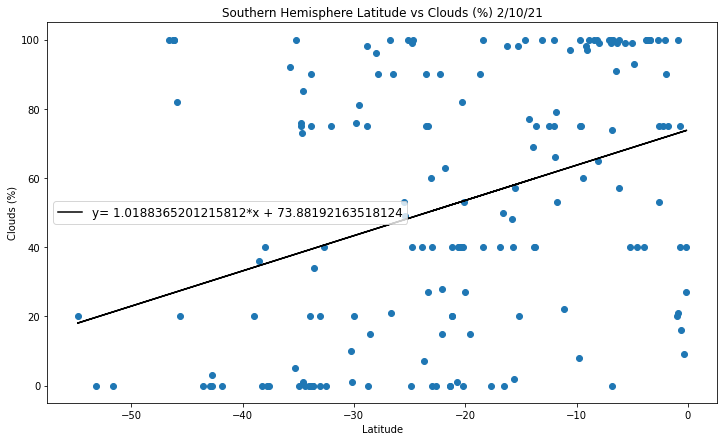

R value is 0.35904520762010067


In [892]:
#Scatter Plot & Linear Regression
v = weatherdf12['lat']
ab = weatherdf12['clouds']
plt.scatter(v, ab)

m, c = np.polyfit(v, ab, 1)
plt.plot(v, (m*v + c), color = "k", label='y= ' + str(m) + '*x + ' + str(c))

slope, intercept, r_value, p_value, std_err = stats.linregress(v,ab)

plt.xlabel('Latitude')
plt.ylabel('Clouds (%)')
plt.title('Southern Hemisphere Latitude vs Clouds (%) 2/10/21')
plt.legend(fontsize=12)
plt.gcf().set_size_inches((12, 7))

plt.savefig('output_data/south_lat_clouds.png')

plt.show()

print("R value is " + str(r_value))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [822]:
#Northern Hemisphere Only
weatherdf13 = cleaned_df[['lat', 'wind mph']].copy()
weatherdf13 = weatherdf13[weatherdf13['lat'] >= 0] 
weatherdf13

,lat,wind mph
name,,
Abu Dhabi,24.4667,4.63
Acapulco de Juárez,16.8634,2.57
Adrar,20.5022,4.95
Adré,13.4667,1.18
Afrikanda,67.4429,2.81
...,...,...
Zhanjiang,21.2815,3.38
Zhigansk,66.7697,4.44
Zverinogolovskoye,54.4586,1.59


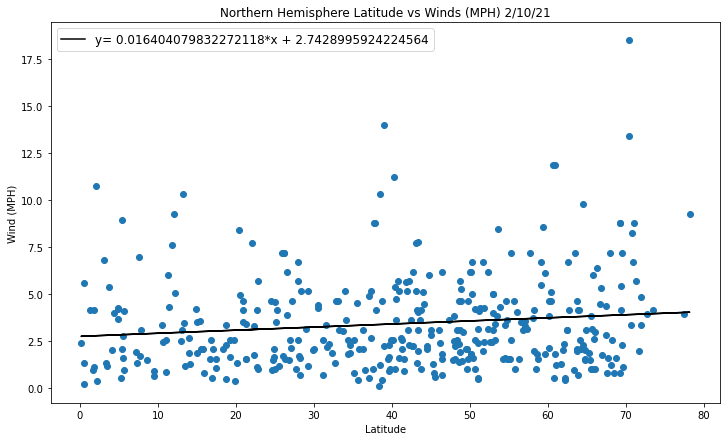

R value is 0.35904520762010067


In [889]:
#Scatter Plot & Linear Regression
bc = weatherdf13['lat']
de = weatherdf13['wind mph']
plt.scatter(bc, de)

m, c = np.polyfit(bc, de, 1)
plt.plot(bc, (m*bc + c), color = "k", label='y= ' + str(m) + '*x + ' + str(c))

slope, intercept, r_value, p_value, std_err = stats.linregress(v,ab)

plt.xlabel('Latitude')
plt.ylabel('Wind (MPH)')
plt.title('Northern Hemisphere Latitude vs Winds (MPH) 2/10/21')
plt.legend(fontsize=12)
plt.gcf().set_size_inches((12, 7))

plt.savefig('output_data/north_lat_wind.png')

plt.show()

print("R value is " + str(r_value))


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [887]:
#Southern Hemisphere Only
weatherdf14 = cleaned_df[['lat', 'wind mph']].copy()
weatherdf14 = weatherdf14[weatherdf14['lat'] <= 0] 
weatherdf14

,lat,wind mph
name,,
Abancay,-13.6339,3.60
Adelaide,-34.9333,3.09
Ahipara,-35.1667,3.77
Airai,-8.9266,0.66
Alenquer,-1.9417,3.60
...,...,...
Vanimo,-2.6741,2.50
Vao,-22.6667,6.90
Vila Velha,-20.3297,4.63


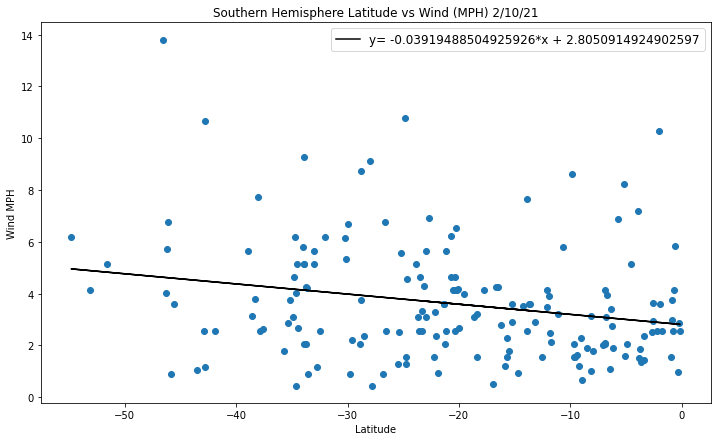

R value is -0.23158166276960598


In [888]:
#Scatter Plot & Linear Regression
lines = plt.figure(figsize=(12, 7))

de = weatherdf14['lat']
ef = weatherdf14['wind mph']
plt.scatter(de, ef)

m, c = np.polyfit(de, ef, 1)
plt.plot(de, (m*de + c), color = "k", label='y= ' + str(m) + '*x + ' + str(c))

slope, intercept, r_value, p_value, std_err = stats.linregress(de,ef)

plt.xlabel('Latitude')
plt.ylabel('Wind MPH')
plt.title('Southern Hemisphere Latitude vs Wind (MPH) 2/10/21')
plt.legend(fontsize=12)
plt.gcf().set_size_inches((12, 7))

plt.savefig('output_data/south_lat_wind.png')

plt.show()

print("R value is " + str(r_value))